In [ ]:
!pip install -q imbalanced-learn


Distribution: Counter({np.int64(0): 250, np.int64(6): 250, np.int64(1): 200, np.int64(2): 200, np.int64(4): 200, np.int64(5): 150, np.int64(3): 150})


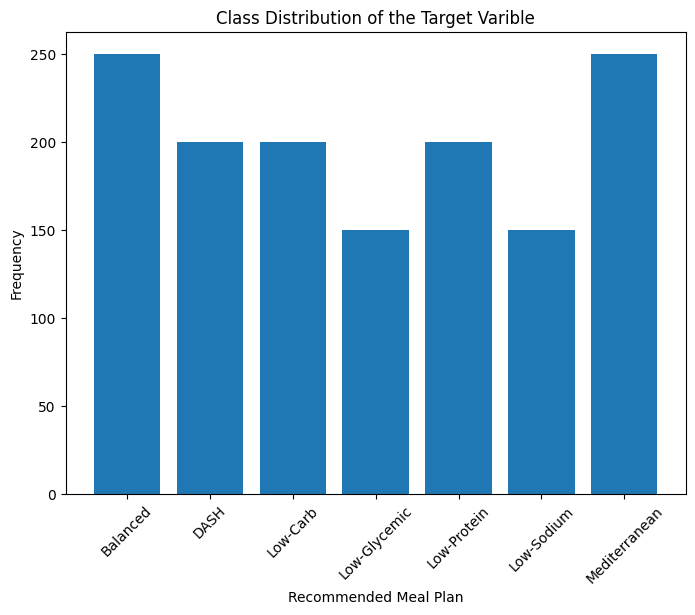

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


# ============================
# 1. Cargar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# Codificar la variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# Distribuci√≥n
print("Distribution:", Counter(y))
plt.figure(figsize=(8, 6))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.xticks(ticks=range(len(le_target.classes_)), labels=le_target.classes_, rotation=45)
plt.title('Class Distribution of the Target Varible')
plt.xlabel('Recommended Meal Plan')
plt.ylabel('Frequency')
plt.show()



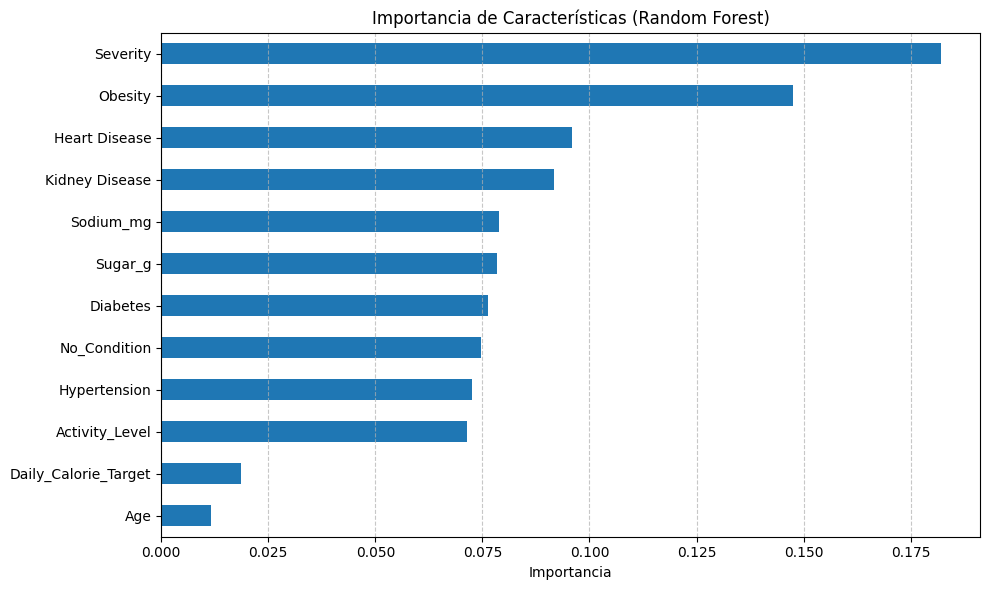

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier



# ============================
# 5. Entrenar modelo Random Forest
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# ============================
# 6. Importancia de caracter√≠sticas
# ============================
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# ============================
# 7. Visualizaci√≥n del ranking
# ============================
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', title="Importancia de Caracter√≠sticas (Random Forest)")
plt.xlabel("Importancia")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

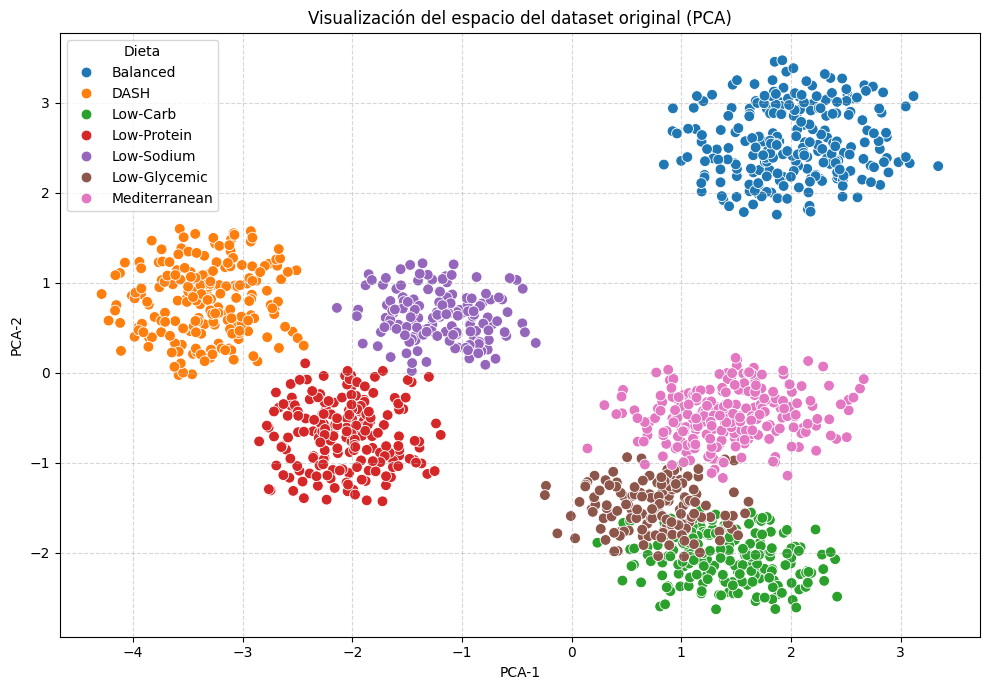

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separar caracter√≠sticas y etiquetas
X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
y = df["Recommended_Meal_Plan_Medical"]

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizaci√≥n
pca_df = pd.DataFrame(X_pca, columns=["PCA-1", "PCA-2"])
pca_df["Dieta"] = y

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PCA-1", y="PCA-2", hue="Dieta", palette="tab10", s=60)
plt.title("Visualizaci√≥n del espacio del dataset original (PCA)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



Fitting 5 folds for each of 45 candidates, totalling 225 fits
üîç Decision Tree - Mejor configuraci√≥n: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        40
     Low-Carb       0.87      1.00      0.93        40
 Low-Glycemic       1.00      0.80      0.89        30
  Low-Protein       1.00      1.00      1.00        40
   Low-Sodium       1.00      1.00      1.00        30
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.98       280
    macro avg       0.98      0.97      0.97       280
 weighted avg       0.98      0.98      0.98       280



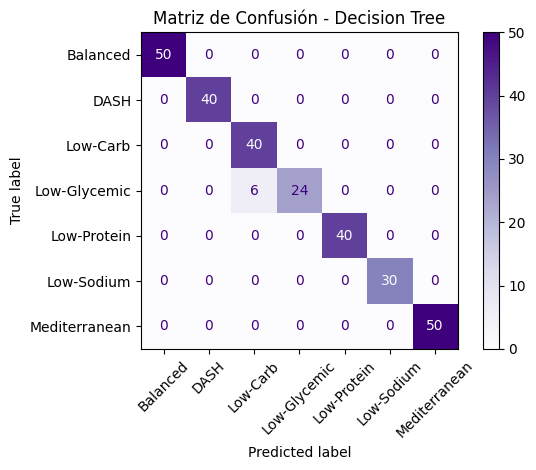

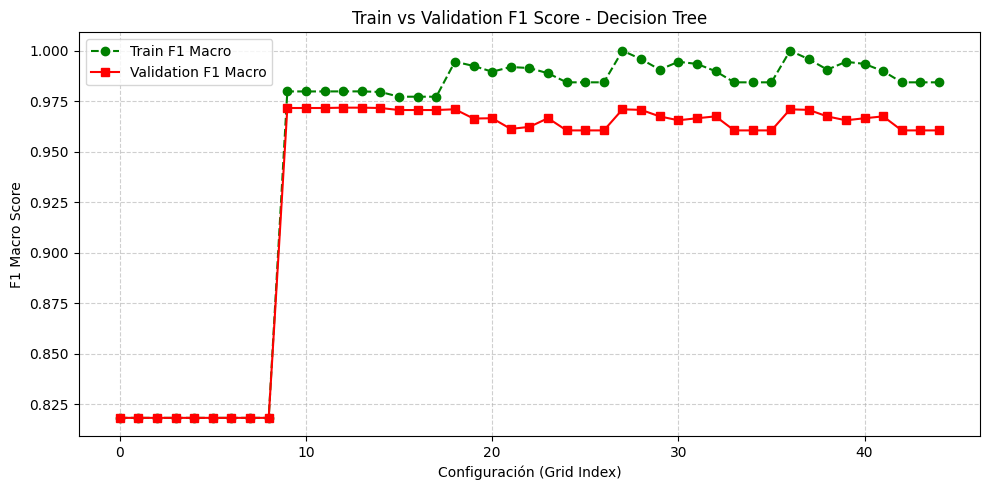

In [10]:
# ============================
# DECISION TREE
# ============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


# ============================
# 2. Split de entrenamiento
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ============================
# 3. Entrenar modelo Decision Tree
# ============================
param_dt = {
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_dt,
    cv=5,
    scoring="f1_macro",
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# ============================
# 4. Evaluaci√≥n
# ============================
y_pred_dt = best_dt.predict(X_test)
print("üîç Decision Tree - Mejor configuraci√≥n:", grid_dt.best_params_)
print(classification_report(y_test, y_pred_dt, target_names=le_target.classes_))

ConfusionMatrixDisplay.from_estimator(
    best_dt, X_test, y_test,
    display_labels=le_target.classes_,
    cmap="Purples"
)
plt.title("Matriz de Confusi√≥n - Decision Tree")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================
# 5. Curva Train vs Validation
# ============================
results_dt = pd.DataFrame(grid_dt.cv_results_)

plt.figure(figsize=(10, 5))
plt.plot(results_dt["mean_train_score"], label="Train F1 Macro", linestyle="--", marker='o', color='green')
plt.plot(results_dt["mean_test_score"], label="Validation F1 Macro", linestyle="-", marker='s', color='red')
plt.xlabel("Configuraci√≥n (Grid Index)")
plt.ylabel("F1 Macro Score")
plt.title("Train vs Validation F1 Score - Decision Tree")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# ============================
# 6. Mostrar √∫ltimo valor de F1 Macro (Train y Validation)
# ============================
last_index = results_dt.index[-1]
last_train_score = results_dt.loc[last_index, "mean_train_score"]
last_val_score = results_dt.loc[last_index, "mean_test_score"]

print(f"üìà √öltimo valor de F1 Macro (Train): {last_train_score:.4f}")
print(f"üìä √öltimo valor de F1 Macro (Validation): {last_val_score:.4f}")

üìà √öltimo valor de F1 Macro (Train): 0.9843
üìä √öltimo valor de F1 Macro (Validation): 0.9605


Fitting 5 folds for each of 108 candidates, totalling 540 fits
üîç Random Forest - Mejor configuraci√≥n: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        40
     Low-Carb       0.89      1.00      0.94        40
 Low-Glycemic       1.00      0.83      0.91        30
  Low-Protein       1.00      1.00      1.00        40
   Low-Sodium       1.00      1.00      1.00        30
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.98       280
    macro avg       0.98      0.98      0.98       280
 weighted avg       0.98      0.98      0.98       280



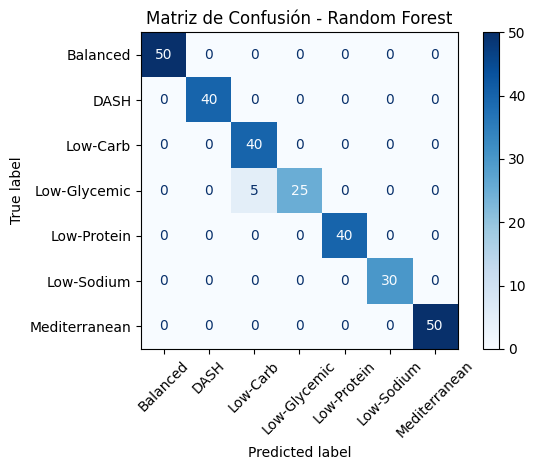

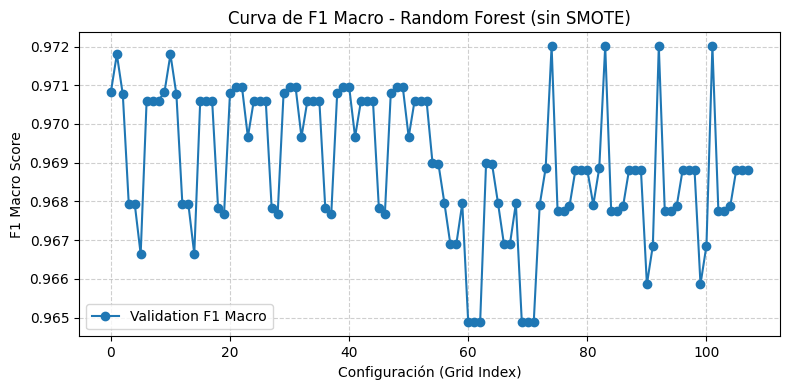

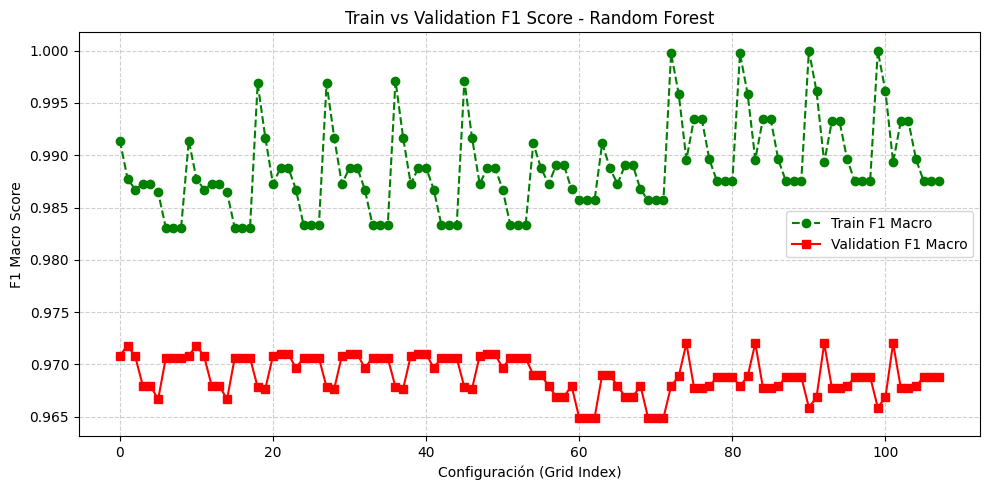

In [11]:
# ============================
# RANDOM FOREST SIN SMOTE
# ============================

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


# ============================
# 2. Divisi√≥n train/test
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ============================
# 3. GridSearchCV para Random Forest
# ============================
param_rf = {
    "n_estimators": [100],
    "max_depth": [10, 15, 20],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
joblib.dump(best_rf, "best_random_forest_model_no_smote.pkl")

# ============================
# 4. Predicci√≥n y resultados
# ============================
y_pred_rf = best_rf.predict(X_test)

print("üîç Random Forest - Mejor configuraci√≥n:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

ConfusionMatrixDisplay.from_estimator(
    best_rf, X_test, y_test,
    display_labels=le_target.classes_,
    cmap="Blues"
)
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================
# 5. Curva de F1 Macro
# ============================
results_rf = pd.DataFrame(grid_rf.cv_results_)

plt.figure(figsize=(8, 4))
plt.plot(results_rf["mean_test_score"], label="Validation F1 Macro", marker='o')
plt.xlabel("Configuraci√≥n (Grid Index)")
plt.ylabel("F1 Macro Score")
plt.title("Curva de F1 Macro - Random Forest (sin SMOTE)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ============================
# 6. Train vs Validation Accuracy
# ============================
plt.figure(figsize=(10, 5))
plt.plot(results_rf["mean_train_score"], label="Train F1 Macro", linestyle="--", marker='o', color='green')
plt.plot(results_rf["mean_test_score"], label="Validation F1 Macro", linestyle="-", marker='s', color='red')
plt.xlabel("Configuraci√≥n (Grid Index)")
plt.ylabel("F1 Macro Score")
plt.title("Train vs Validation F1 Score - Random Forest")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [12]:
# ============================
# 7. Mostrar √∫ltimo valor de F1 Macro (Train y Validation)
# ============================
last_index = results_rf.index[-1]
last_train_score = results_rf.loc[last_index, "mean_train_score"]
last_val_score = results_rf.loc[last_index, "mean_test_score"]

print(f"üìà √öltimo valor de F1 Macro (Train): {last_train_score:.4f}")
print(f"üìä √öltimo valor de F1 Macro (Validation): {last_val_score:.4f}")

üìà √öltimo valor de F1 Macro (Train): 0.9875
üìä √öltimo valor de F1 Macro (Validation): 0.9688


Epoch 1/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 40ms/step - accuracy: 0.1720 - loss: 2.9029 - val_accuracy: 0.2991 - val_loss: 1.9334 - learning_rate: 1.0000e-04
Epoch 2/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - accuracy: 0.2568 - loss: 2.4239 - val_accuracy: 0.4732 - val_loss: 1.8084 - learning_rate: 1.0000e-04
Epoch 3/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - accuracy: 0.2985 - loss: 2.2544 - val_accuracy: 0.6161 - val_loss: 1.6662 - learning_rate: 1.0000e-04
Epoch 4/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - accuracy: 0.4271 - loss: 1.7690 - val_accuracy: 0.6830 - val_loss: 1.5098 - learning_rate: 1.0000e-04
Epoch 5/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.4657 - loss: 1.5892 - val_accuracy: 0.7723 - val_loss: 1.3431 - learning_rate: 1.0000e-04
Epoch 6/100
28/28 ‚îÅ

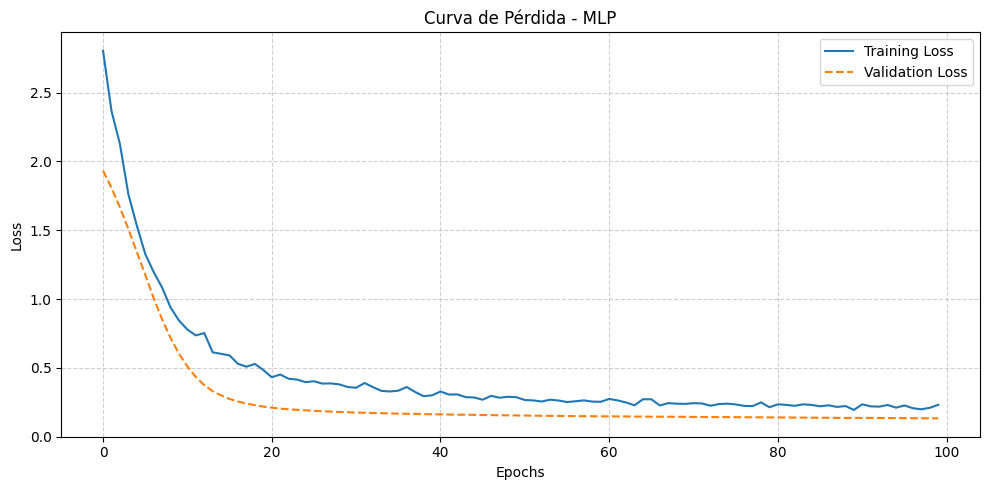

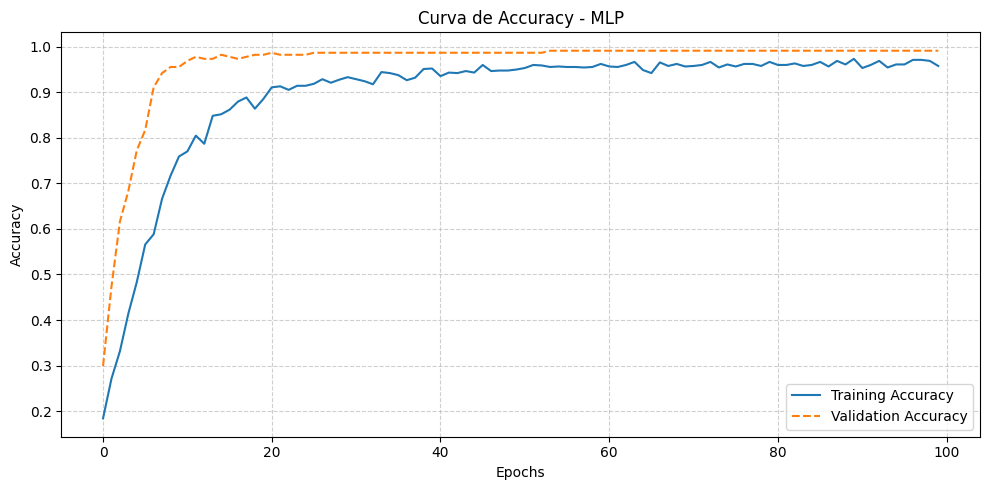

9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step
üîç Reporte de Clasificaci√≥n (Test):
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        40
     Low-Carb       0.95      0.97      0.96        40
 Low-Glycemic       0.97      0.93      0.95        30
  Low-Protein       1.00      1.00      1.00        40
   Low-Sodium       1.00      1.00      1.00        30
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.99       280
    macro avg       0.99      0.99      0.99       280
 weighted avg       0.99      0.99      0.99       280



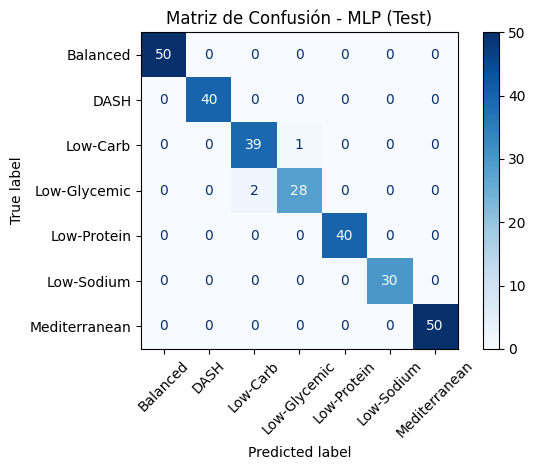

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, regularizers

# ============================
# 1. Cargar y preparar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# Codificar variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
categorical_cols = X.select_dtypes(include="object").columns
X[categorical_cols] = OrdinalEncoder().fit_transform(X[categorical_cols])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 2. Divisi√≥n 80% entrenamiento / 20% test
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 3. Modelo MLP Regularizado
# ============================
n_classes = len(np.unique(y))
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.GaussianNoise(0.1),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ============================
# 4. Callbacks
# ============================
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# ============================
# 5. Class Weights
# ============================
class_weights = dict(
    zip(
        np.unique(y_train),
        compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    )
)

# ============================
# 6. Entrenamiento (con validaci√≥n interna del 20%)
# ============================
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% de los datos de entrenamiento para validaci√≥n
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=callbacks_list,
    verbose=1
)

# ============================
# 7. Curvas de entrenamiento
# ============================
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Curva de P√©rdida - MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title("Curva de Accuracy - MLP")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ============================
# 8. Evaluaci√≥n en test
# ============================
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("üîç Reporte de Clasificaci√≥n (Test):")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=le_target.classes_,
    cmap="Blues"
)
plt.title("Matriz de Confusi√≥n - MLP (Test)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


üéØ Features seleccionadas: ['Activity_Level', 'Sodium_mg', 'Sugar_g', 'Severity', 'Diabetes', 'Obesity', 'Heart Disease', 'Hypertension', 'Kidney Disease', 'No_Condition']
Epoch 1/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 14ms/step - accuracy: 0.2111 - loss: 2.7300 - val_accuracy: 0.8839 - val_loss: 1.5560 - learning_rate: 5.0000e-04
Epoch 2/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.6697 - loss: 1.0031 - val_accuracy: 0.9241 - val_loss: 1.1796 - learning_rate: 5.0000e-04
Epoch 3/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.8694 - loss: 0.5716 - val_accuracy: 0.9375 - val_loss: 0.9265 - learning_rate: 5.0000e-04
Epoch 4/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.9106 - loss: 0.4222 - val_accuracy: 0.9598 - val_loss: 0.7420 - learning_rate: 5.0000e-04
Epoch 5/100
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

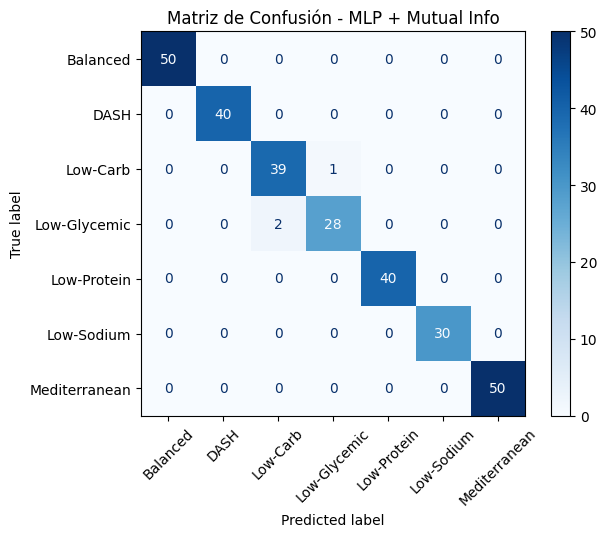

               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        40
     Low-Carb       0.95      0.97      0.96        40
 Low-Glycemic       0.97      0.93      0.95        30
  Low-Protein       1.00      1.00      1.00        40
   Low-Sodium       1.00      1.00      1.00        30
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.99       280
    macro avg       0.99      0.99      0.99       280
 weighted avg       0.99      0.99      0.99       280



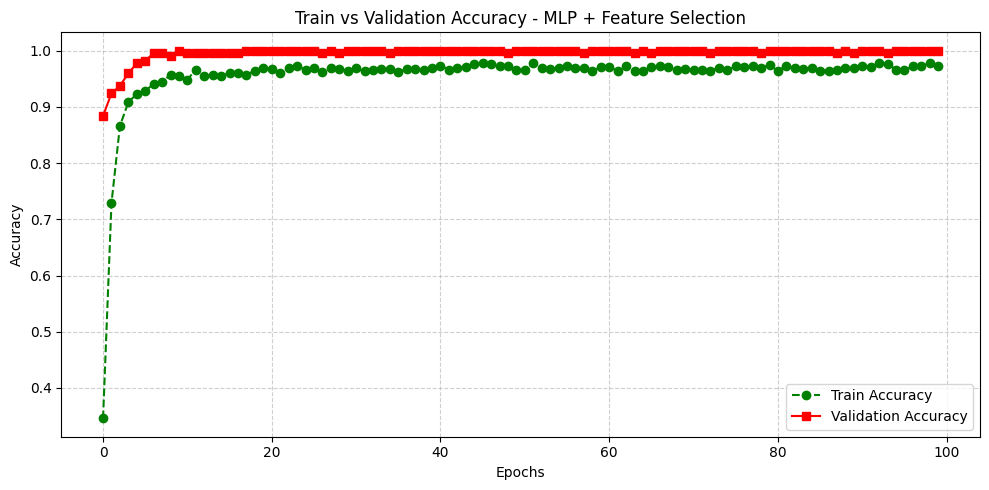

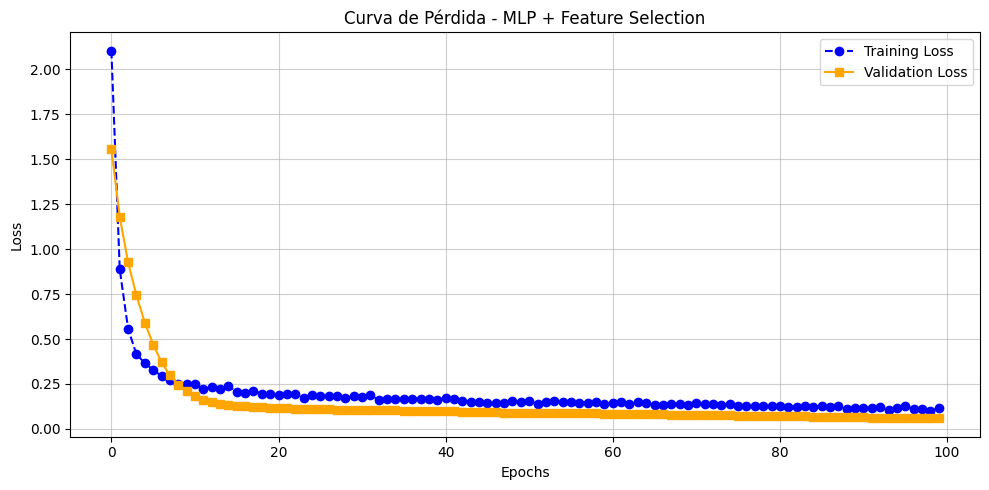

‚úÖ Modelo MLP guardado como 'mlp_mutual_info_model.keras'
‚úÖ Scaler guardado como 'scaler_mutual_info.pkl'
‚úÖ Features seleccionadas guardadas como 'selected_features_mutual_info.pkl'
‚úÖ Label encoder guardado como 'label_encoder_target.pkl'


In [6]:
# ============================
# MLP + Mutual Info Feature Selection
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, regularizers

# ============================
# 1. Cargar y preparar datos
# ============================
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
categorical_cols = X.select_dtypes(include="object").columns
X[categorical_cols] = OrdinalEncoder().fit_transform(X[categorical_cols])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 2. Feature selection
# ============================
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("üéØ Features seleccionadas:", list(selected_features))

# ============================
# 3. Divisi√≥n y Escalamiento
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ============================
# 4. Modelo MLP
# ============================
n_classes = len(np.unique(y))
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ============================
# 5. Callbacks
# ============================
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# ============================
# 6. Entrenamiento
# ============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)

# ============================
# 7. Evaluaci√≥n
# ============================
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=le_target.classes_,
    cmap="Blues"
)
plt.title("Matriz de Confusi√≥n - MLP + Mutual Info")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# ============================
# 8. Curvas de entrenamiento
# ============================
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--', marker='o', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='s', color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy - MLP + Feature Selection")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ============================
# 9. Curva de P√©rdida (Loss)
# ============================
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='s', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Curva de P√©rdida - MLP + Feature Selection")
plt.grid(True, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Guardar el modelo MLP
model.save("mlp_mutual_info_model.keras")
print("‚úÖ Modelo MLP guardado como 'mlp_mutual_info_model.keras'")

# Guardar el scaler
joblib.dump(scaler, "scaler_mutual_info.pkl")
print("‚úÖ Scaler guardado como 'scaler_mutual_info.pkl'")

# Guardar las features seleccionadas
joblib.dump(selected_features, "selected_features_mutual_info.pkl")
print("‚úÖ Features seleccionadas guardadas como 'selected_features_mutual_info.pkl'")

# Guardar el label encoder
joblib.dump(le_target, "label_encoder_target.pkl")
print("‚úÖ Label encoder guardado como 'label_encoder_target.pkl'")



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step
üìä Distribuci√≥n de predicciones (1000 pacientes simulados):

               Frecuencia  Porcentaje
Balanced              103        10.3
DASH                  342        34.2
Low-Carb               13         1.3
Low-Glycemic           76         7.6
Low-Protein           132        13.2
Low-Sodium             64         6.4
Mediterranean         270        27.0


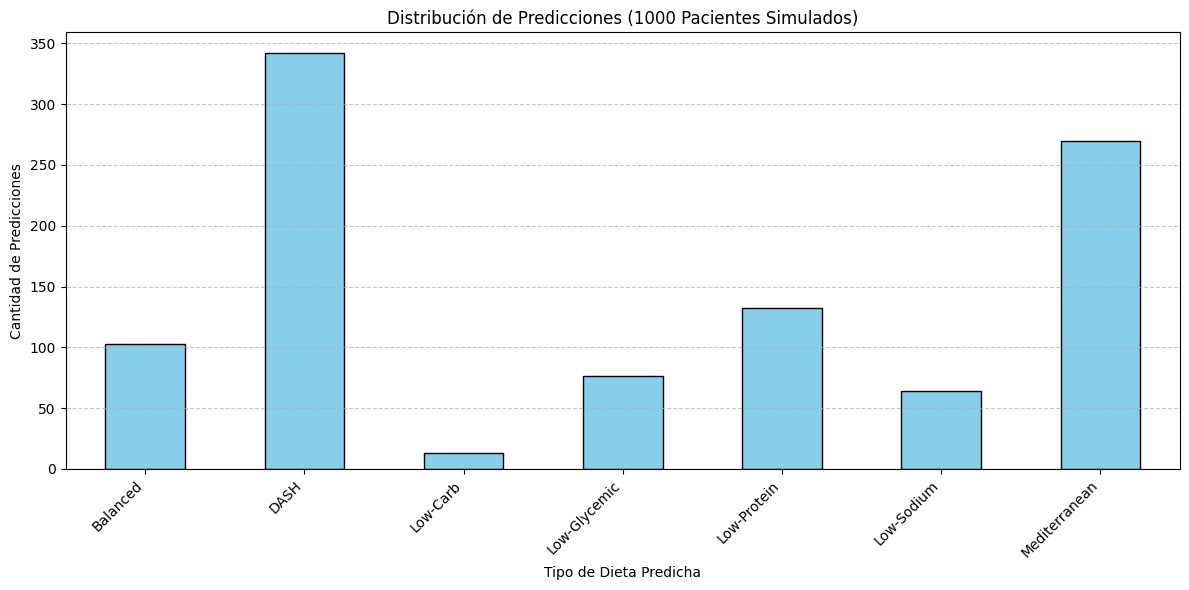

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# ============================
# 1. Cargar modelo y recursos
# ============================
model = tf.keras.models.load_model("mlp_mutual_info_model.keras")
selected_features = joblib.load("selected_features_mutual_info.pkl")
label_encoder = joblib.load("label_encoder_target.pkl")
scaler = joblib.load("scaler_mutual_info.pkl")

# ============================
# 2. Simulaci√≥n de pacientes
# ============================


# Simular condiciones m√©dicas
simulated_data = pd.DataFrame({
    "Activity_Level": np.random.randint(0, 5, 1000),
    "Sodium_mg": np.random.uniform(500, 2500, 1000),
    "Sugar_g": np.random.uniform(5, 60, 1000),
    "Severity": np.random.choice([0, 1, 2], size=1000),  # M√°s real: mayor√≠a leves
    "Diabetes": np.random.randint(0, 2, 1000),
    "Obesity": np.random.randint(0, 2, 1000),
    "Heart Disease": np.random.randint(0, 2, 1000),
    "Hypertension": np.random.randint(0, 2, 1000),
    "Kidney Disease": np.random.randint(0, 2, 1000),
})

# Corregir No_Condition
conditions = ["Diabetes", "Obesity", "Heart Disease", "Hypertension", "Kidney Disease"]
simulated_data["No_Condition"] = (simulated_data[conditions].sum(axis=1) == 0).astype(int)

# ============================
# 3. Predecir
# ============================
X_simulated = simulated_data[selected_features]
X_simulated_scaled = scaler.transform(X_simulated)

y_pred_probs = model.predict(X_simulated_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

# ============================
# 4. Mostrar distribuci√≥n
# ============================
pred_df = pd.Series(predicted_labels).value_counts().sort_index()
pred_df.name = "Frecuencia"

# Mostrar tabla de frecuencia y porcentaje
pred_summary = pd.DataFrame({
    "Frecuencia": pred_df,
    "Porcentaje": (pred_df / pred_df.sum() * 100).round(2)
})
print("üìä Distribuci√≥n de predicciones (1000 pacientes simulados):\n")
print(pred_summary)

# Visualizaci√≥n
plt.figure(figsize=(12, 6))
pred_df.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribuci√≥n de Predicciones (1000 Pacientes Simulados)")
plt.xlabel("Tipo de Dieta Predicha")
plt.ylabel("Cantidad de Predicciones")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


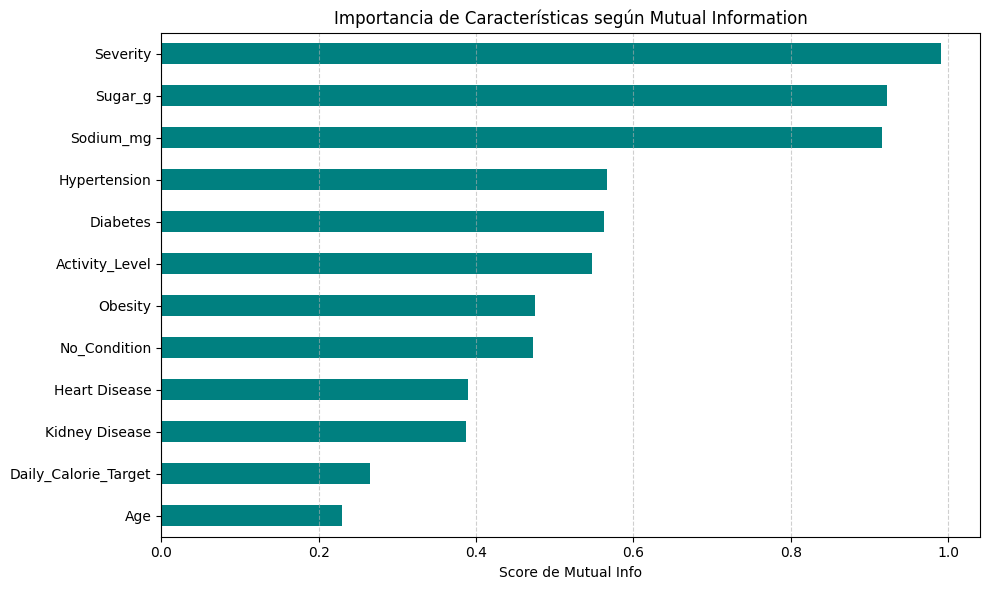


üìä Ranking de caracter√≠sticas:

Severity                0.9908
Sugar_g                 0.9227
Sodium_mg               0.9158
Hypertension            0.5669
Diabetes                0.5628
Activity_Level          0.5468
Obesity                 0.4747
No_Condition            0.4727
Heart Disease           0.3898
Kidney Disease          0.3873
Daily_Calorie_Target    0.2657
Age                     0.2301
dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer

# ============================
# 1. Cargar dataset
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# ============================
# 2. Preprocesamiento
# ============================
X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
y = df["Recommended_Meal_Plan_Medical"]

# Imputar NaNs
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 3. Mutual Information
# ============================
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)

# Ranking
mi_scores = pd.Series(mi_selector.scores_, index=X.columns).sort_values(ascending=True)

# ============================
# 4. Visualizaci√≥n
# ============================
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='barh', color='teal')
plt.title("Importancia de Caracter√≠sticas seg√∫n Mutual Information")
plt.xlabel("Score de Mutual Info")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# (Opcional) Mostrar valores num√©ricos
print("\nüìä Ranking de caracter√≠sticas:\n")
print(mi_scores.sort_values(ascending=False).round(4))
